# Image Classification & Dimensionality Reduction

In [22]:
# Emir Aydın
# S020843

In [23]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
np.random.seed(42) # DO NOT CHANGE
random.seed(42) # DO NOT CHANGE

In [24]:
# Defining the function for loading MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [25]:
# Initializing train and test datasets 
X_train, y_train = load_mnist('data', kind='train')
X_test, y_test = load_mnist('data', kind='t10k')

In [26]:
X_train.shape

(60000, 784)

In [27]:
#Normalization

X_train_std=X_train/255
X_test_std=X_test/255

In [28]:
y_test.shape

(10000,)

In [29]:
# defining a method for plotting x_train_std images
def image_plotting(image,n):
    plt.subplot(1,5,n)
    plt.axis("off")
    plt.imshow(image)

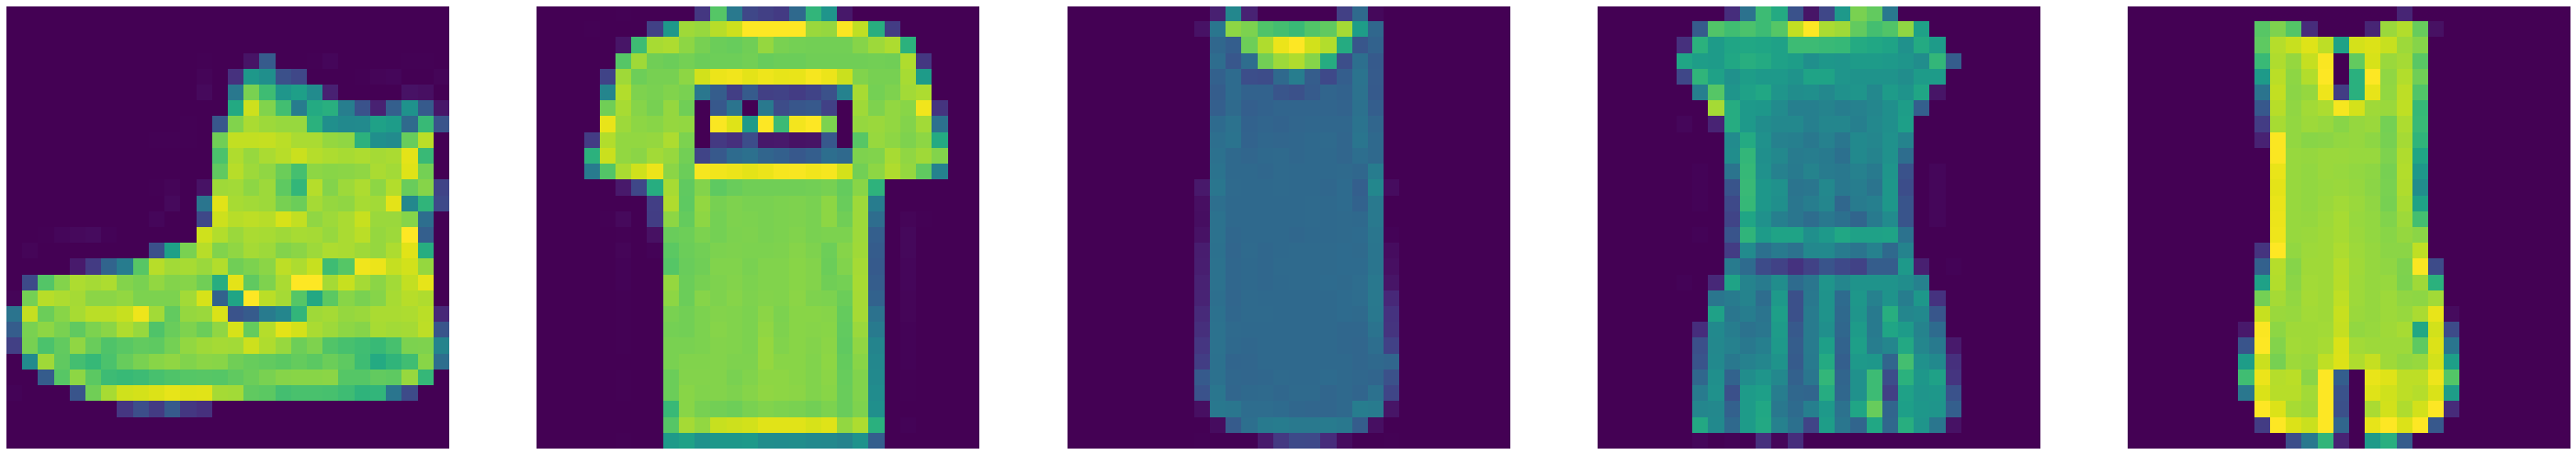

In [30]:
# plotting the first five image of x_train_std
plt.figure(figsize=(50,20))
for i in range(5):
    w=np.resize(X_train_std[i,:],(28,28))
    image_plotting(w,i+1)
plt.show()

# First Implementation of Algorithms and Predictions


In [31]:
# Initializing the K-Neighbors, Perceptron,
# SVM, Decision Tree and Random Forest classifiers
# with their hyper-parameters
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2)
perceptron = Perceptron(alpha=0.001)
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
# Declaring arrays to store classifiers and their names
models=np.array([knn,perceptron,svm,dt,rf])
names=np.array(["KNN","Perceptron","SVM","Decision Tree","Random Forest"])

In [32]:
import seaborn as sns #importing seaborn for plotting heatmap
# Declaring a new method for plotting confusion matrixes by using heatmap from seaborn
def plot_confusion_matrix(y_test, y_predicted):  
    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_predicted))  
    fig = plt.figure(figsize=(25, 15))  
    sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt="g")  
    plt.title("Confusion Matrix")  
    plt.xlabel("Predicted Label")  
    plt.ylabel("True Label")  
    plt.show() 

In [33]:
predict_acc=np.array([]) # Array for storing accuracies of predictions
# Function for all 5 algorithms to make prediction with data that returns the accuracies
def predict_model(model,name,X1,X2,y1,y2):
    model.fit(X1,y1)
    y_predict=model.predict(X2)
    accur =accuracy_score(y_predict,y2)
    confusion_mat = confusion_matrix(y2,y_predict)
    plt.figure(figsize=(10,10))
    print("First 25 Instance Prediction of ",name)
    # Visualizing first 25 element of test values with their predicted labels
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.resize(X2[i,:],(28,28)), cmap=plt.cm.binary)
        plt.xlabel(y_predict[i])
    plt.show()
    print("Accuracy of the ",name,": ",accur) # Printing accuracy of the model
    print("Confusion Matrix of the ",name," : ") 
    plot_confusion_matrix(y2,y_predict) #Plotting confusion matrix of the model
    return accur

First 25 Instance Prediction of  KNN


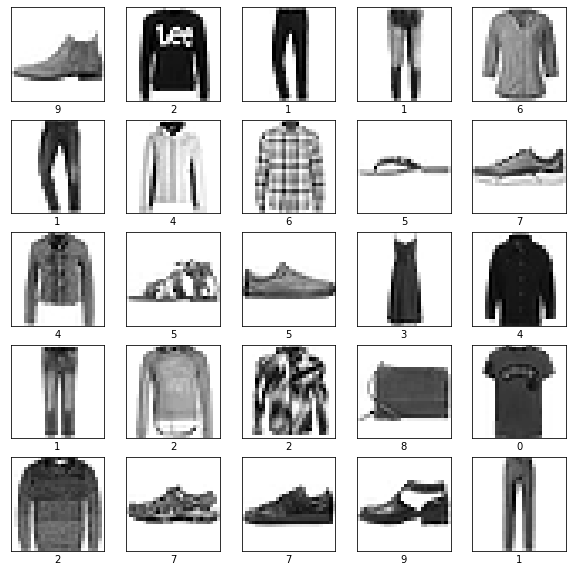

Accuracy of the  KNN :  0.8541
Confusion Matrix of the  KNN  : 


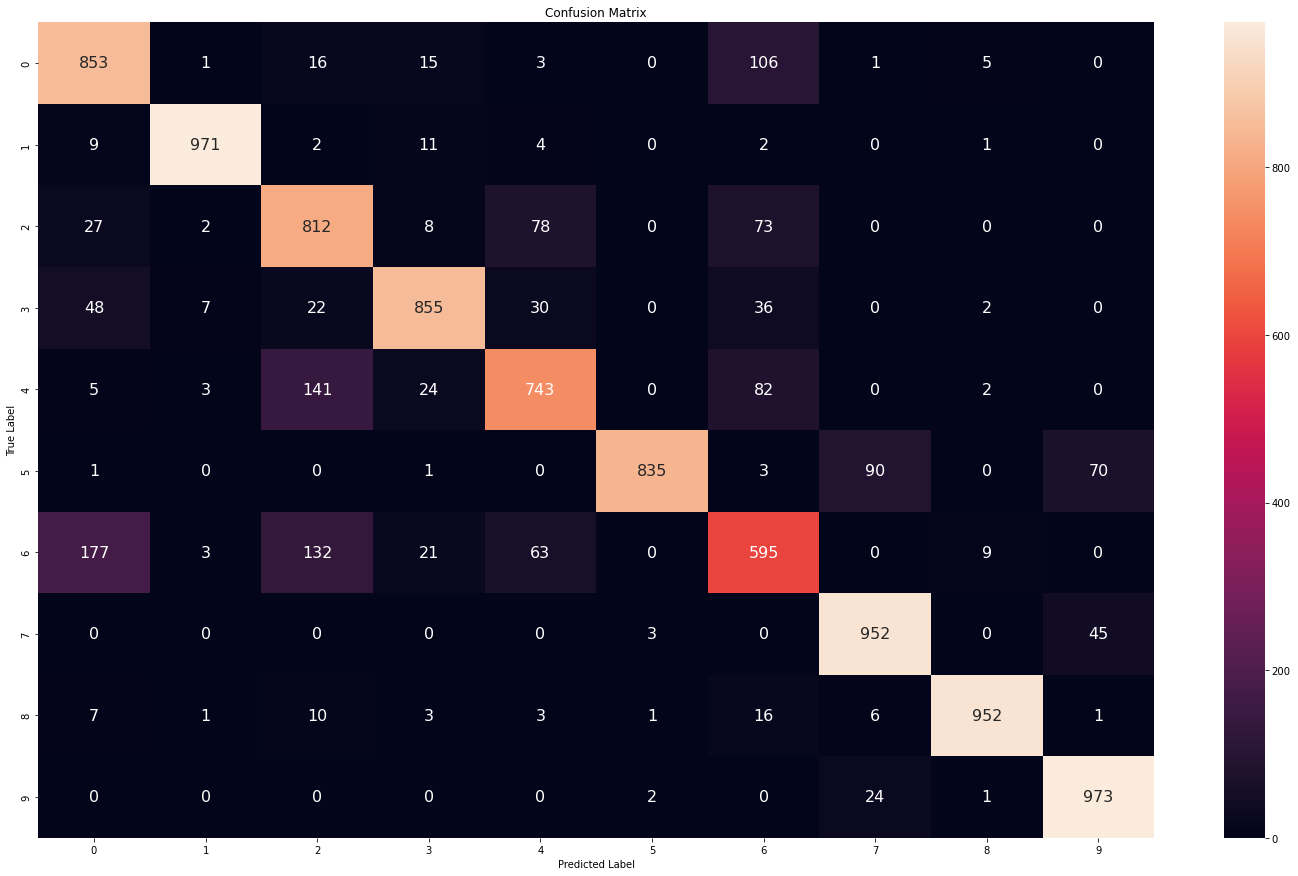

First 25 Instance Prediction of  Perceptron


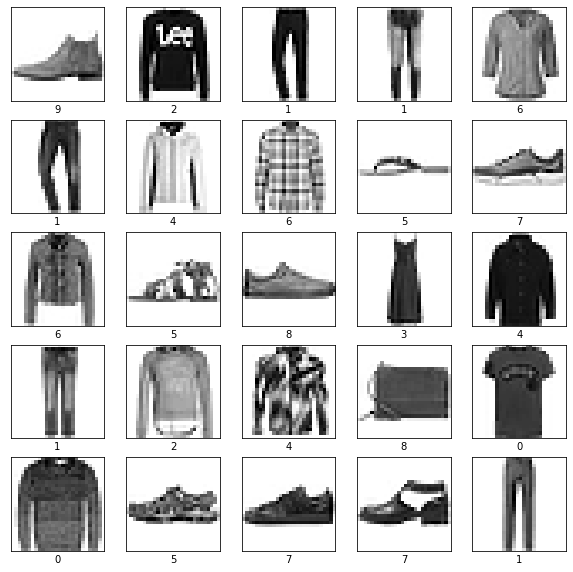

Accuracy of the  Perceptron :  0.7834
Confusion Matrix of the  Perceptron  : 


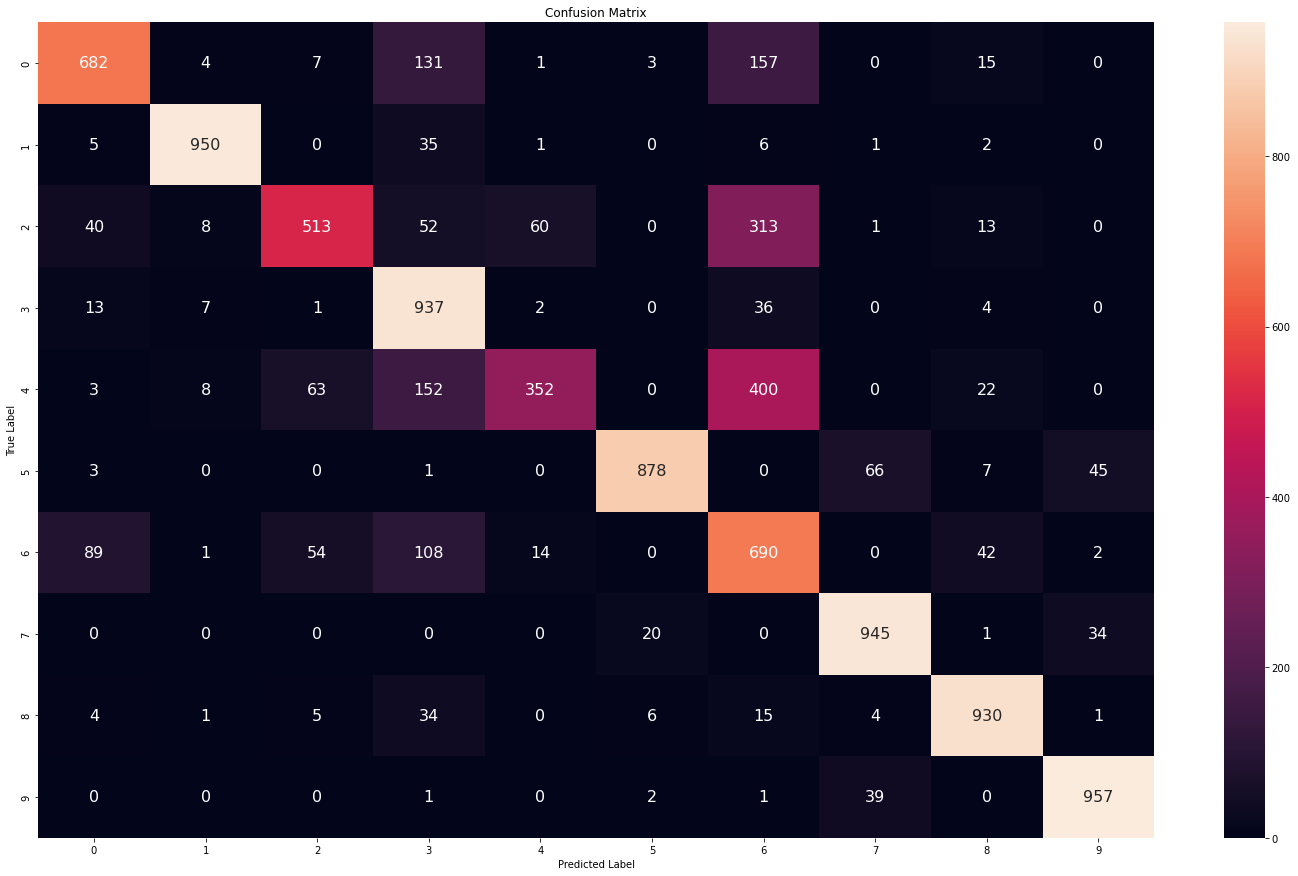

First 25 Instance Prediction of  SVM


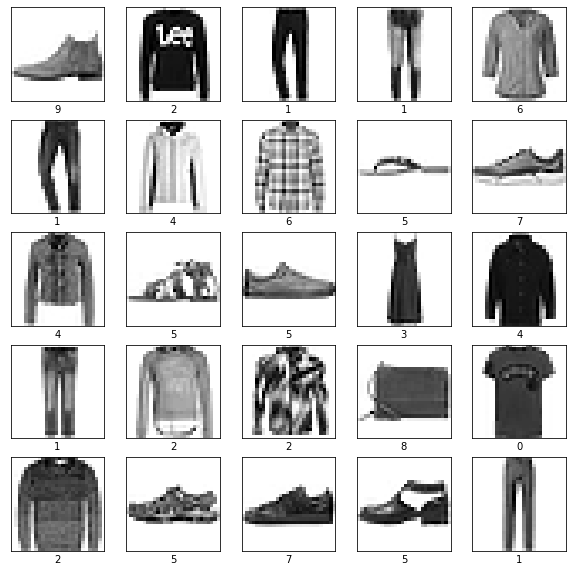

Accuracy of the  SVM :  0.8828
Confusion Matrix of the  SVM  : 


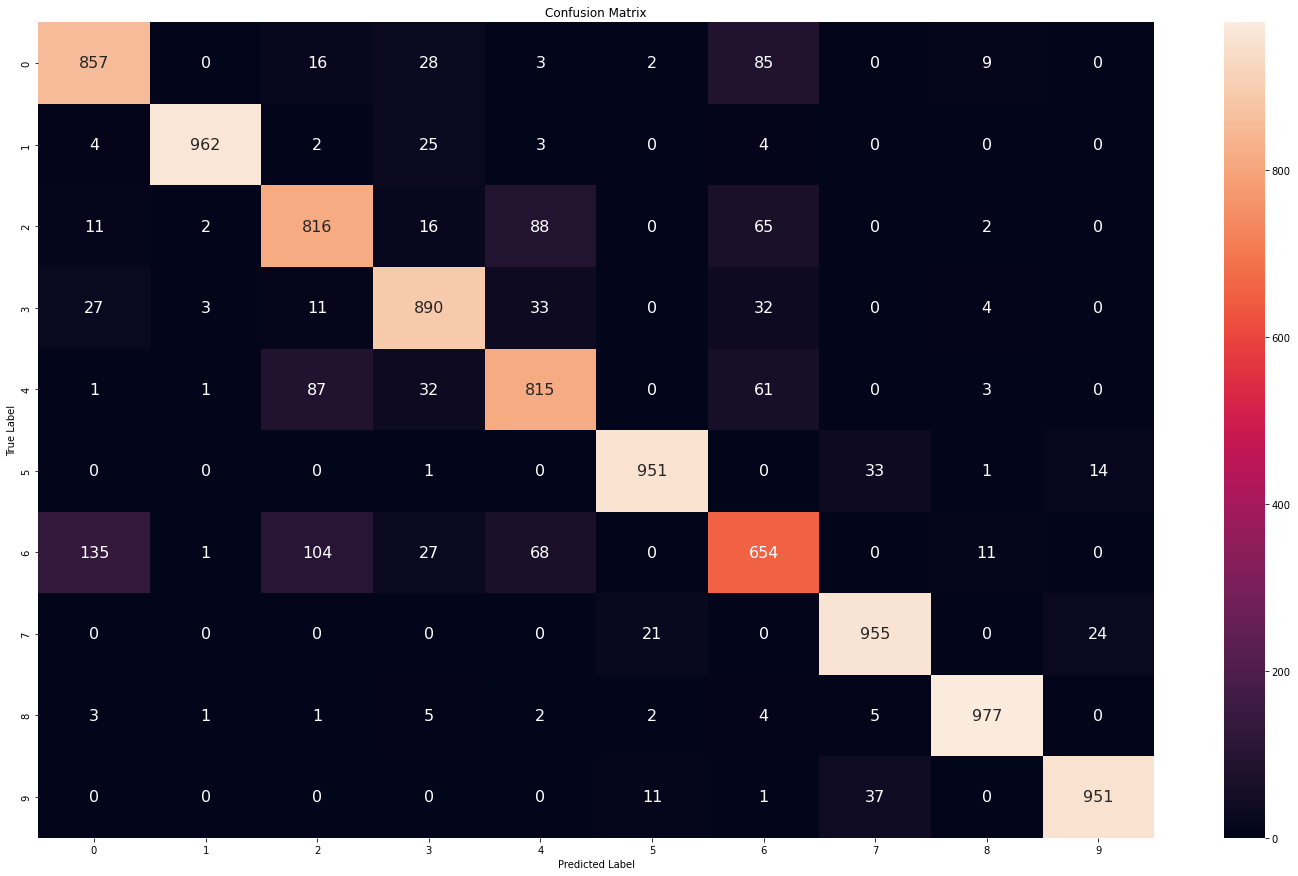

First 25 Instance Prediction of  Decision Tree


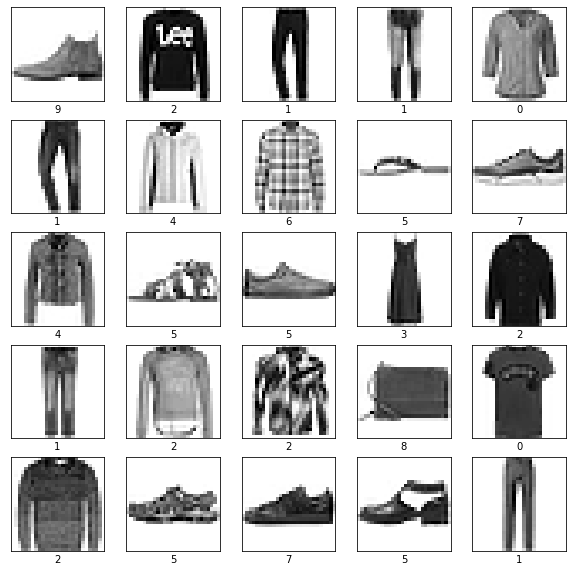

Accuracy of the  Decision Tree :  0.7893
Confusion Matrix of the  Decision Tree  : 


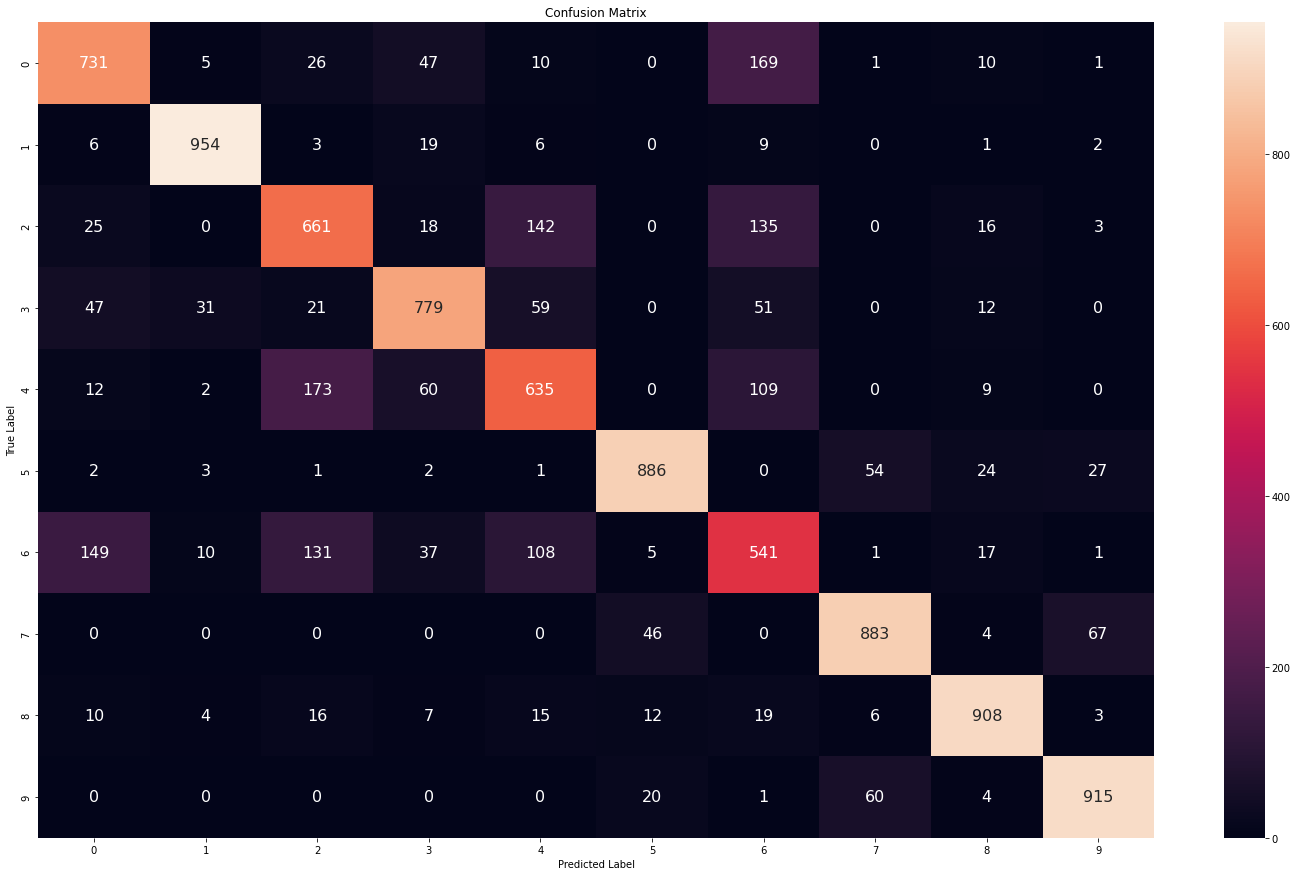

First 25 Instance Prediction of  Random Forest


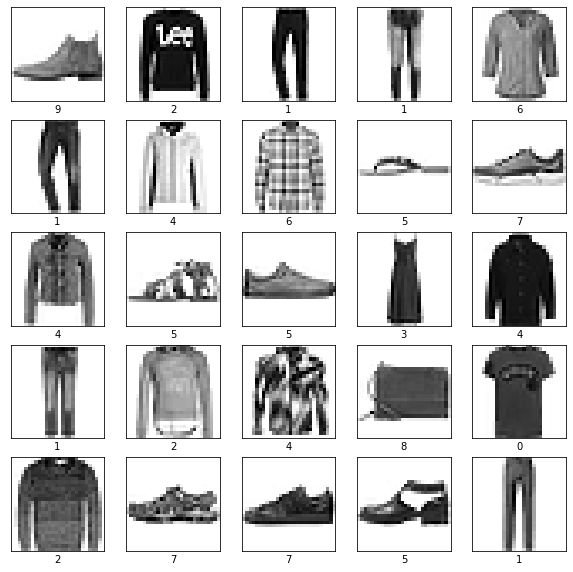

Accuracy of the  Random Forest :  0.8768
Confusion Matrix of the  Random Forest  : 


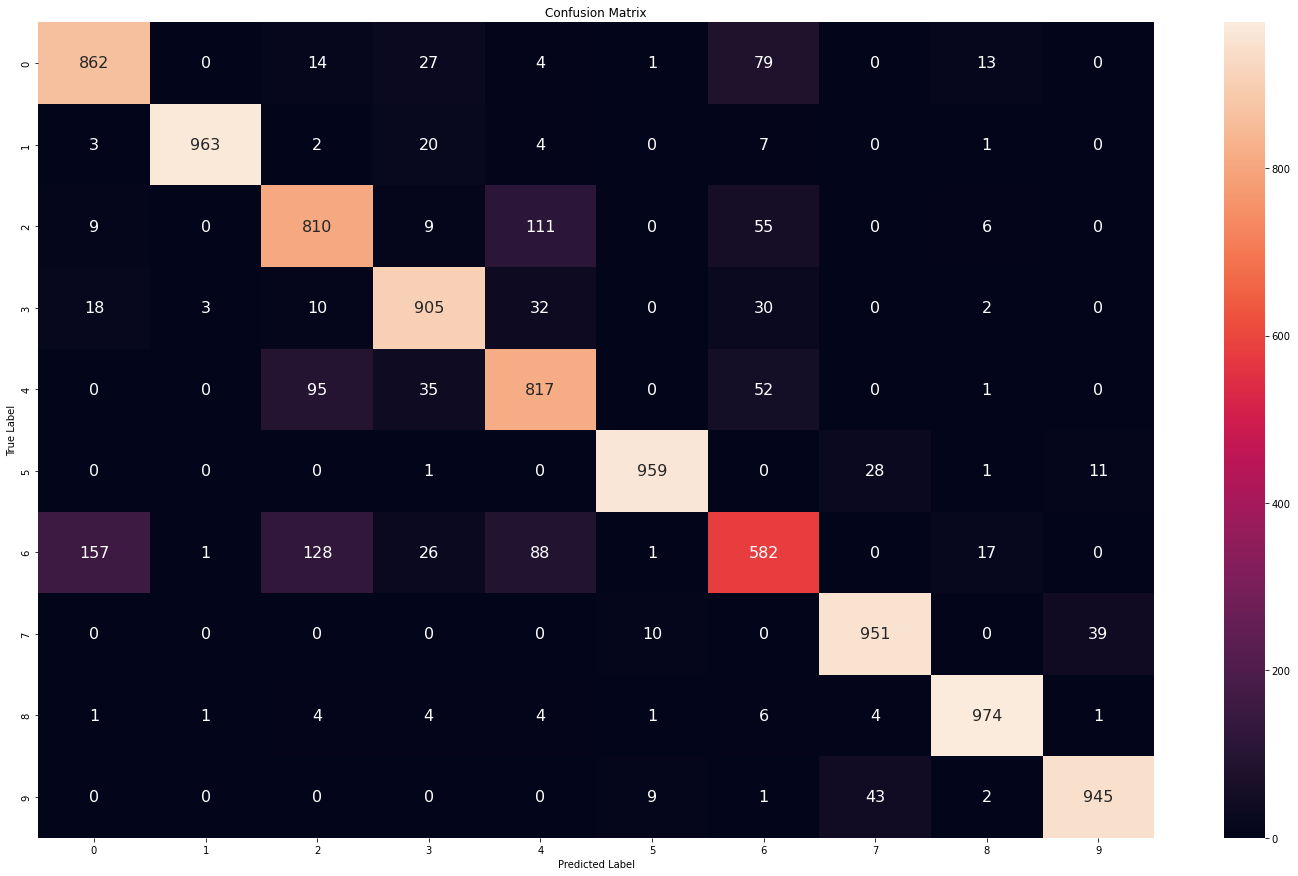

In [34]:
# making predictions for all model in models array
for i in range(models.size):
    acc0=predict_model(models[i],names[i],X_train_std,X_test_std,y_train,y_test)
    predict_acc=np.append(predict_acc,acc0)

In [35]:
# Printing the accuracies of algorithms after first implementation
for n in range(names.size):
    print("Accuracy of the ",names[n],": ",predict_acc[n])

Accuracy of the  KNN :  0.8541
Accuracy of the  Perceptron :  0.7834
Accuracy of the  SVM :  0.8828
Accuracy of the  Decision Tree :  0.7893
Accuracy of the  Random Forest :  0.8768


# Principal Component Analysis (PCA)

In [36]:
# Declaring four different pca with different ratio of explained variances
pca_arr=np.array([])
pca_25 = PCA(n_components=0.25)
pca_arr=np.append(pca_arr,pca_25)
pca_50 = PCA(n_components=0.50)
pca_arr=np.append(pca_arr,pca_50)
pca_75 = PCA(n_components=0.75)
pca_arr=np.append(pca_arr,pca_75)
pca_95 = PCA(n_components=0.95)
pca_arr=np.append(pca_arr,pca_95)
pca_arr.size

4

In [37]:
# Inside a for loop, the number of components
# to explain the given ratios of variance
# the dataset will be found and displayed
variance_arr=np.array([25,50,75,95])
components=np.array([])
for j in range(pca_arr.size):
    # Fitting the PCA object to the data
    pca=pca_arr[j]
    pca.fit(X_train_std)
    # Get the number of components required to explain P% of the variance
    n_components = pca.n_components_ # number of components
    components= np.append(components,n_components)
    print("Number of components required to explain ",variance_arr[j],"% of the variance: {}".format(n_components))

Number of components required to explain  25 % of the variance: 1
Number of components required to explain  50 % of the variance: 3
Number of components required to explain  75 % of the variance: 14
Number of components required to explain  95 % of the variance: 187


In [38]:
components=components.astype('int32') # Changing the data type as integers
print(components)

[  1   3  14 187]


## Implementing Algorithms after Finding Components


In [39]:
acc_arr=np.array([])
cm_arr=np.array([])
# Building a function make prediction for each 5 model by using each component which were found
# total 20 predictions
# This function will return accuracies and confusion metrixes of given models for each component
def build_model_withPca(model,name,X1,X2,Y1,Y2,components):
    model_acc=np.array([])
    model_cm=np.array([])
    for i in range(components.size):
        myPCA=PCA(n_components=components[i]) # Declaring a PCA for giving number of components
        myPCA.fit(X1) # Fitting the PCA object to the data
        X1_pca=myPCA.transform(X1) # Transforming X_train_std for PCA
        X2_pca=myPCA.transform(X2) # Transforming X_test_std for PCA
        model.fit(X1_pca, Y1)
        ypred=model.predict(X2_pca)
        cm=confusion_matrix(Y2,ypred)
        accuracy = accuracy_score(ypred,Y2)
        # Calculating and printing accuracy after PCA 
        print("Accuracy of the ",name," with ",components[i]," number of components: ",accuracy)
        plot_confusion_matrix(y_test,ypred) # Plotting confusion matrixes
        model_acc=np.append(model_acc,accuracy)
        model_cm=np.append(model_cm,cm)
    return model_acc,cm_arr
    

Accuracy of the  KNN  with  1  number of components:  0.2222


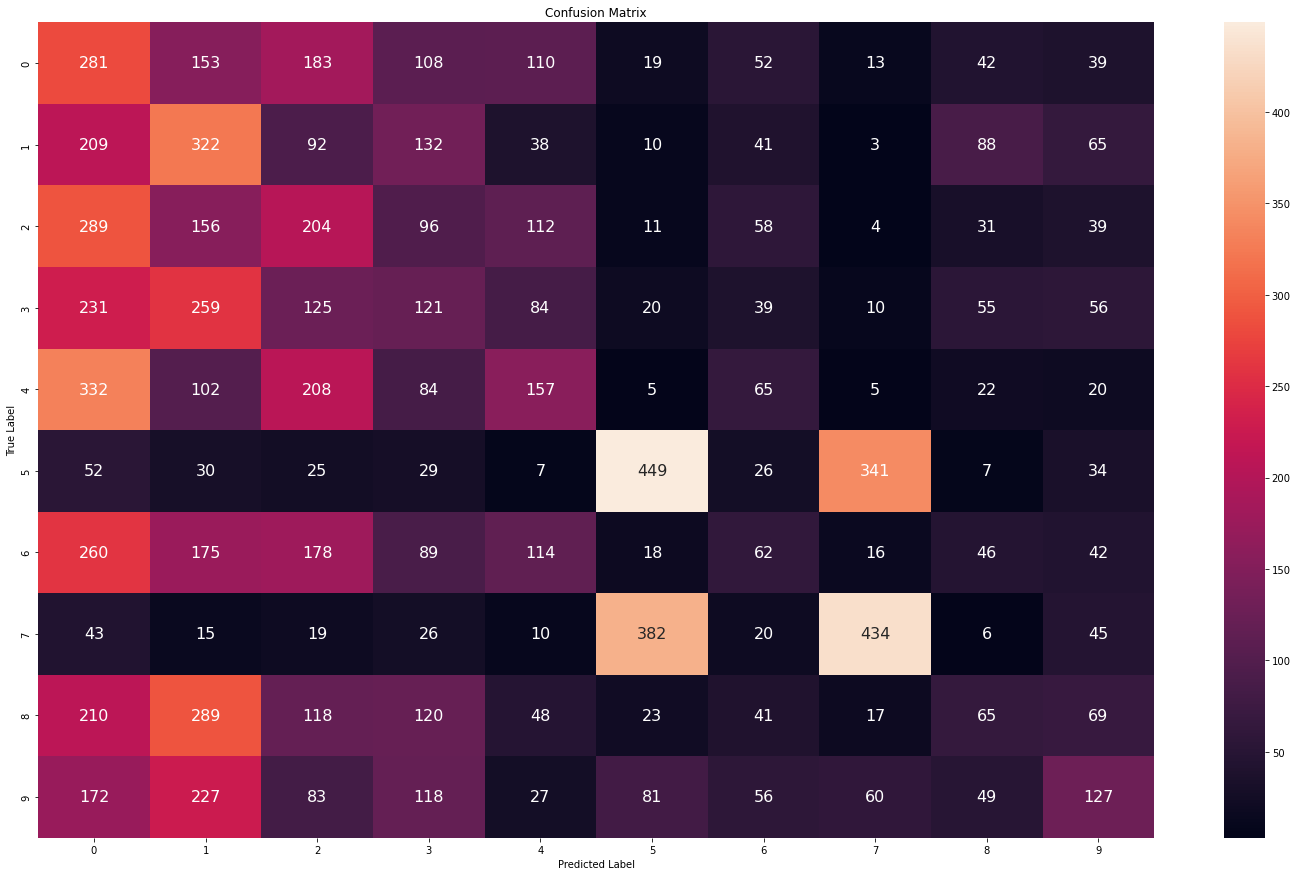

Accuracy of the  KNN  with  3  number of components:  0.6062


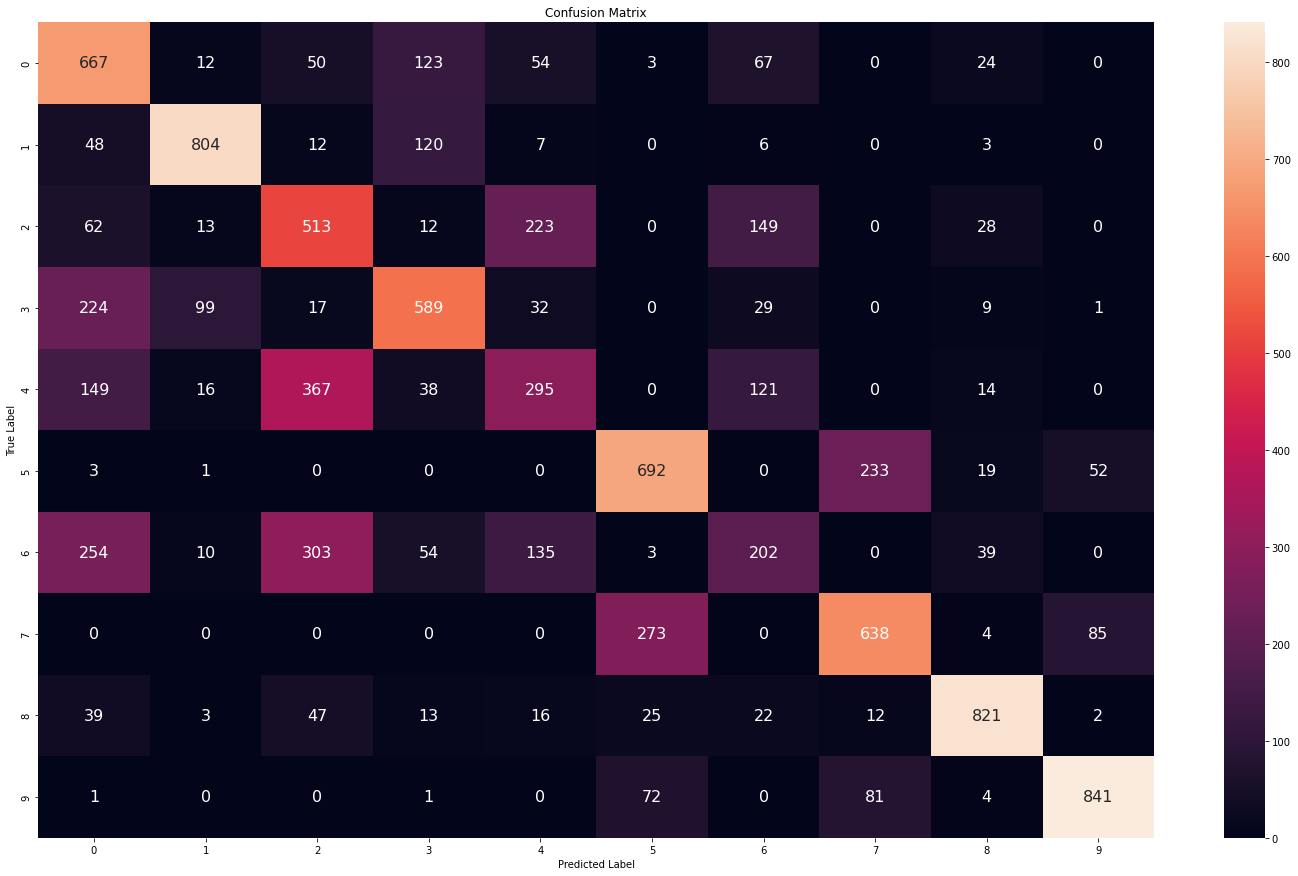

Accuracy of the  KNN  with  14  number of components:  0.8185


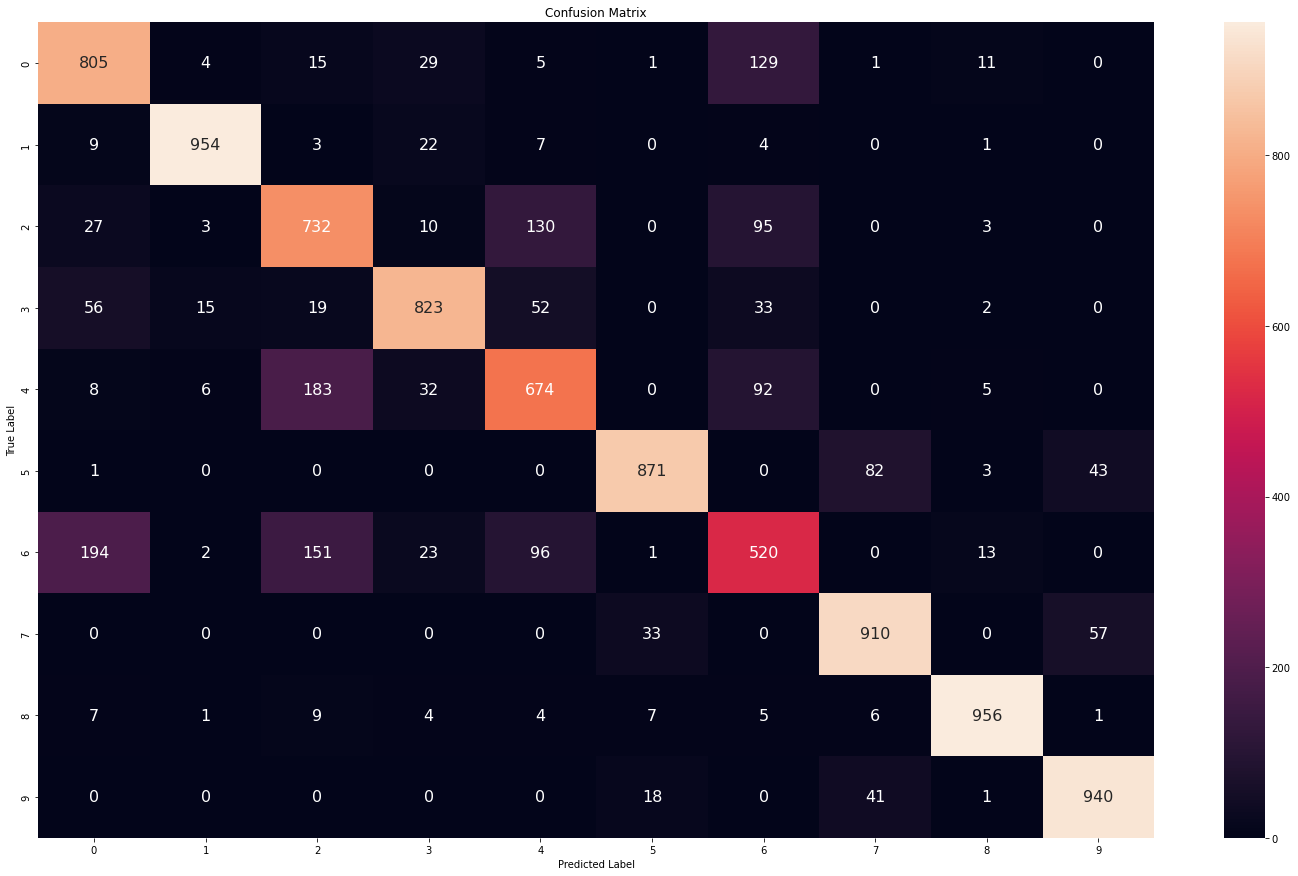

Accuracy of the  KNN  with  187  number of components:  0.8586


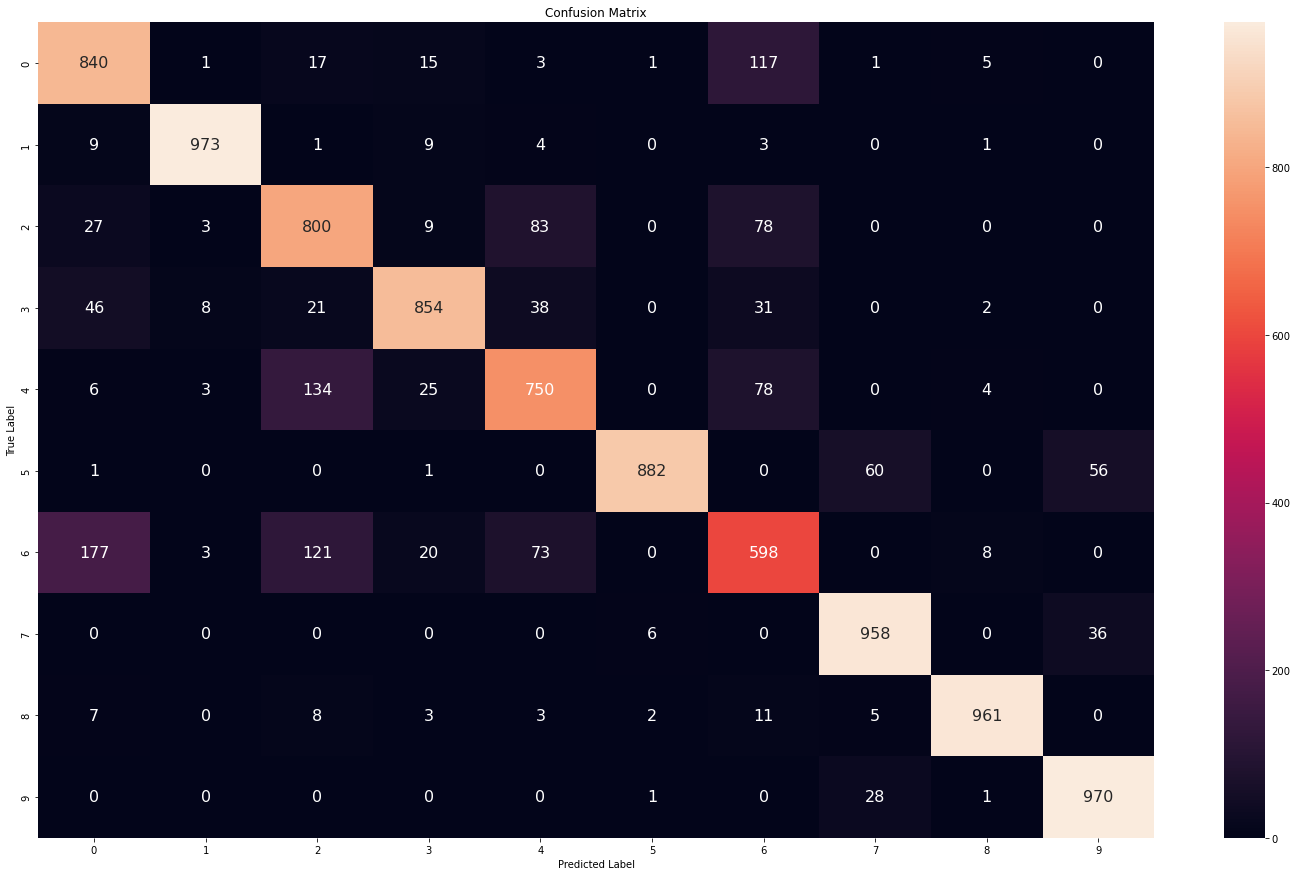

Accuracy of the  Perceptron  with  1  number of components:  0.2324


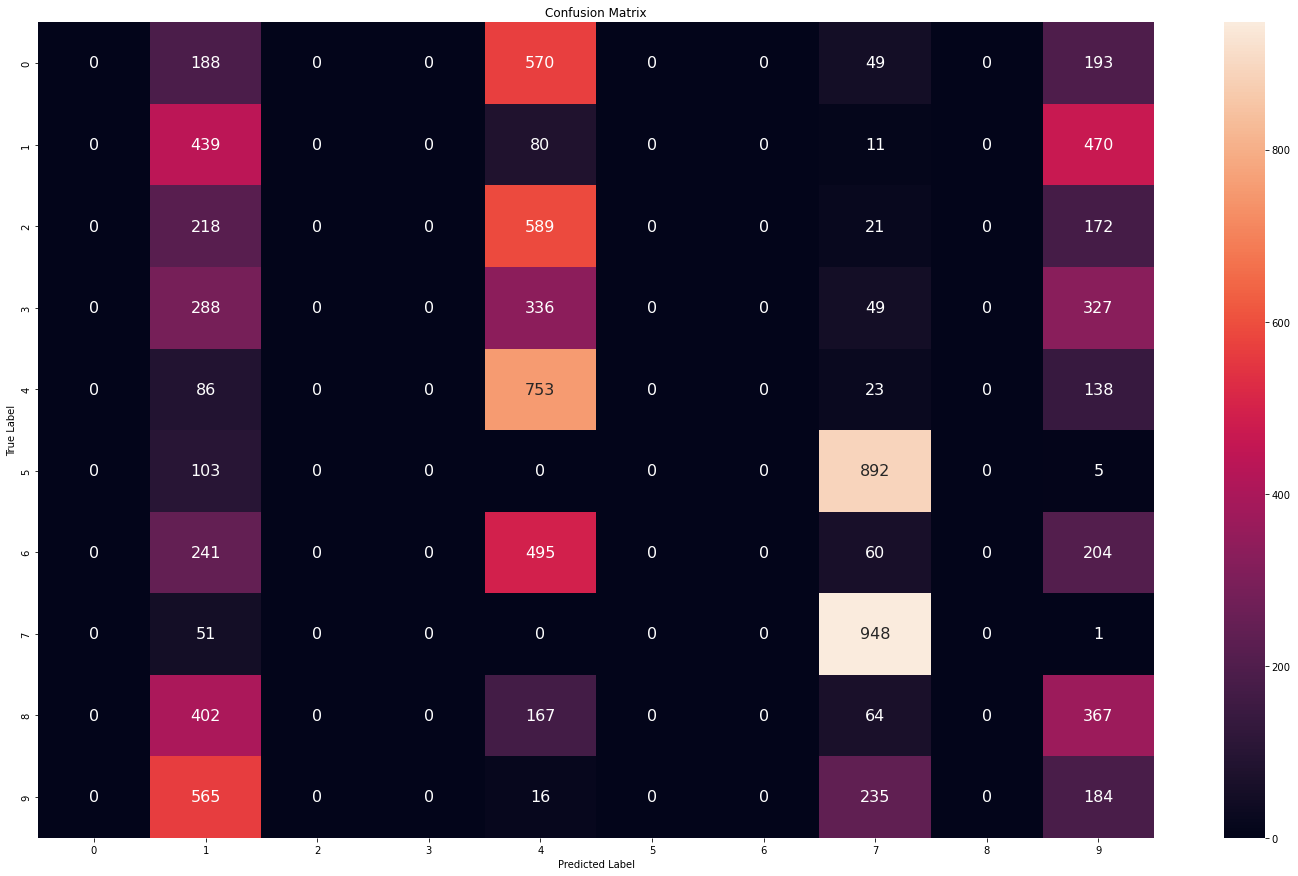

Accuracy of the  Perceptron  with  3  number of components:  0.3685


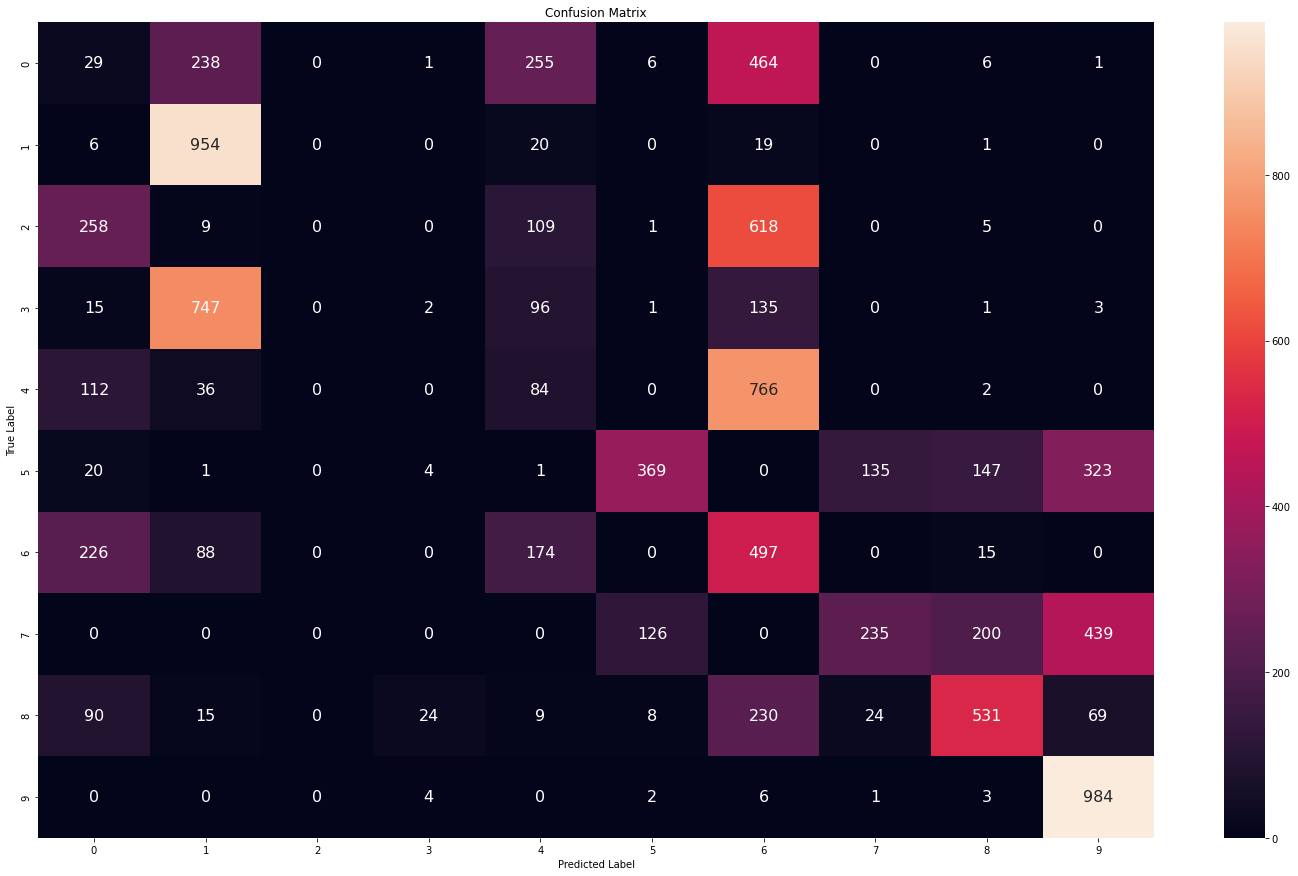

Accuracy of the  Perceptron  with  14  number of components:  0.6652


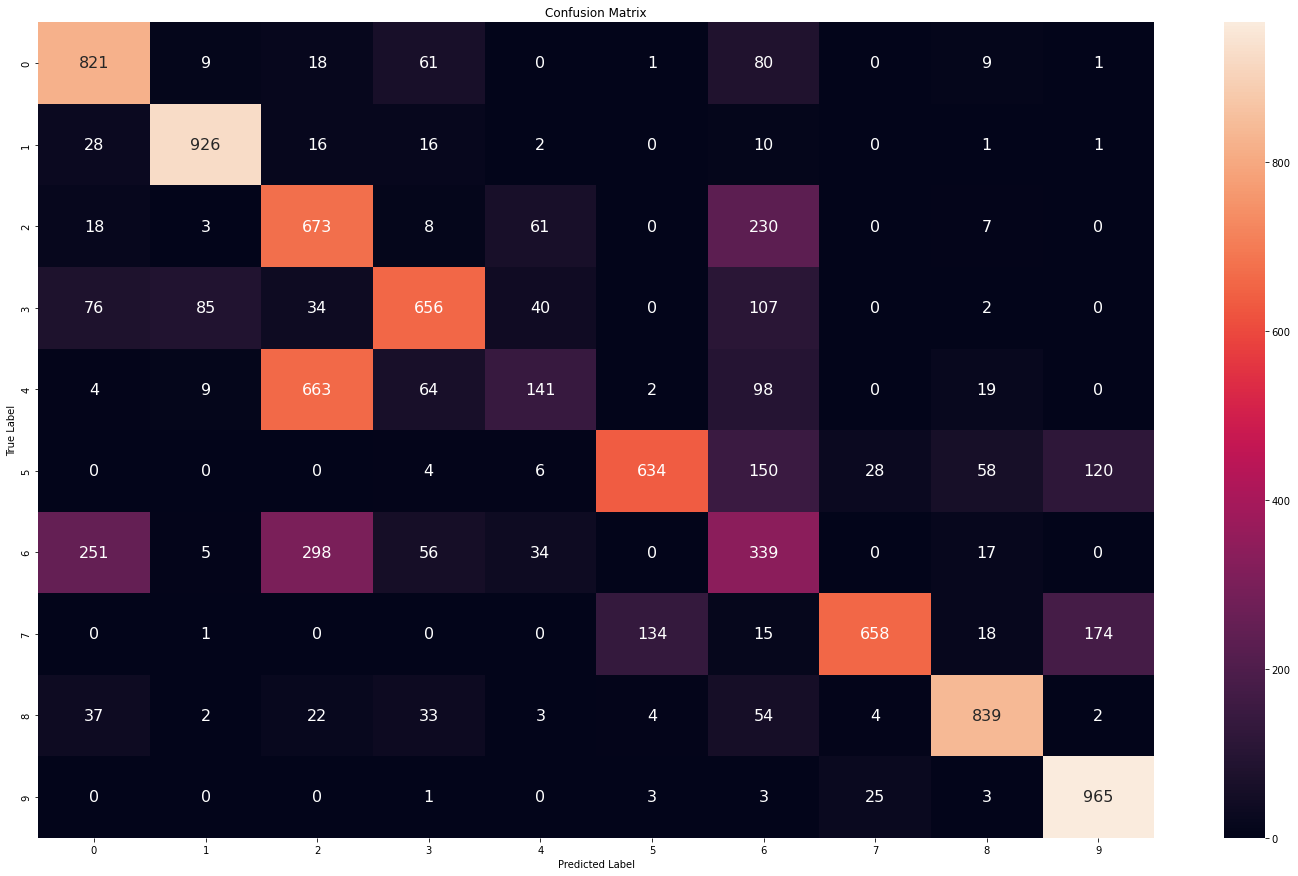

Accuracy of the  Perceptron  with  187  number of components:  0.7827


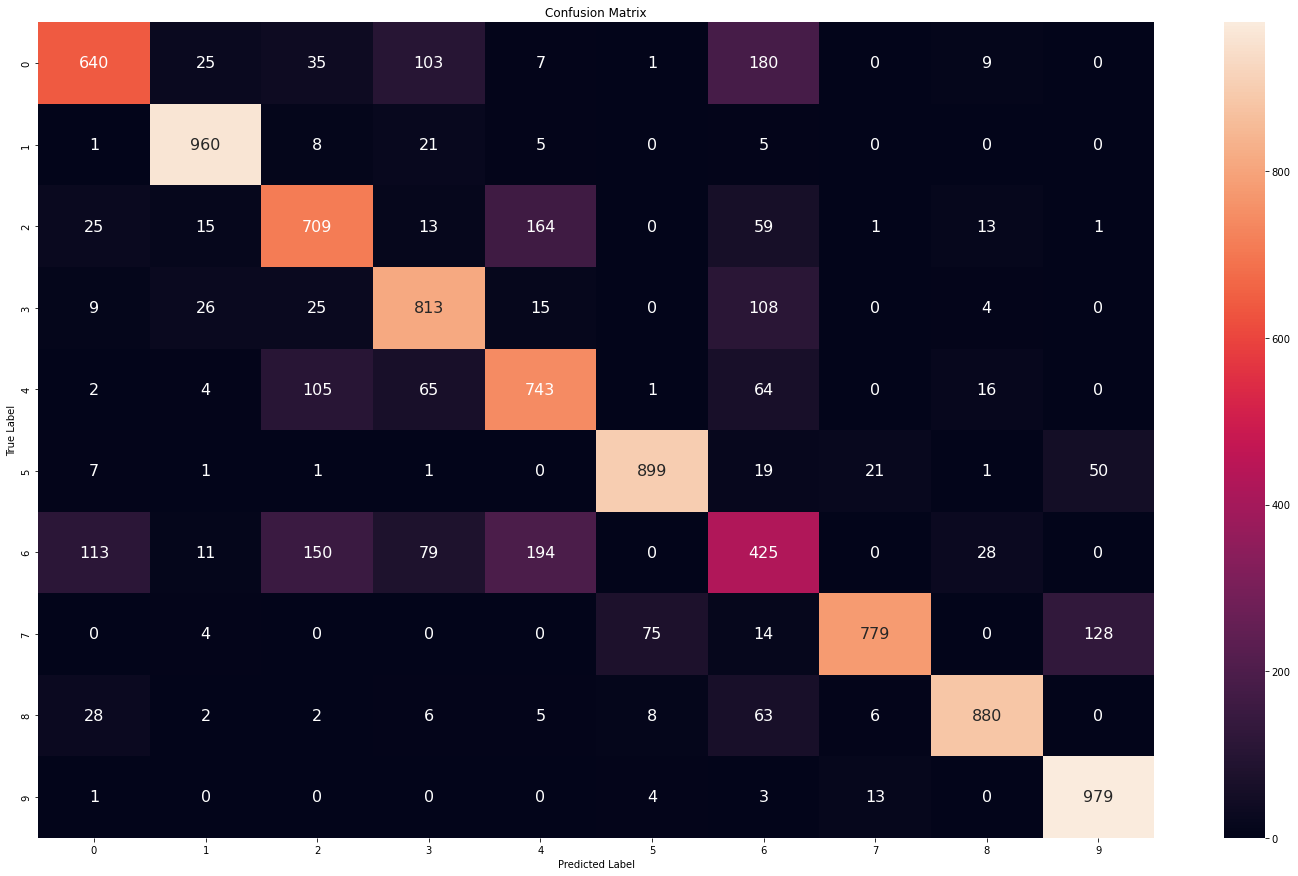

Accuracy of the  SVM  with  1  number of components:  0.3142


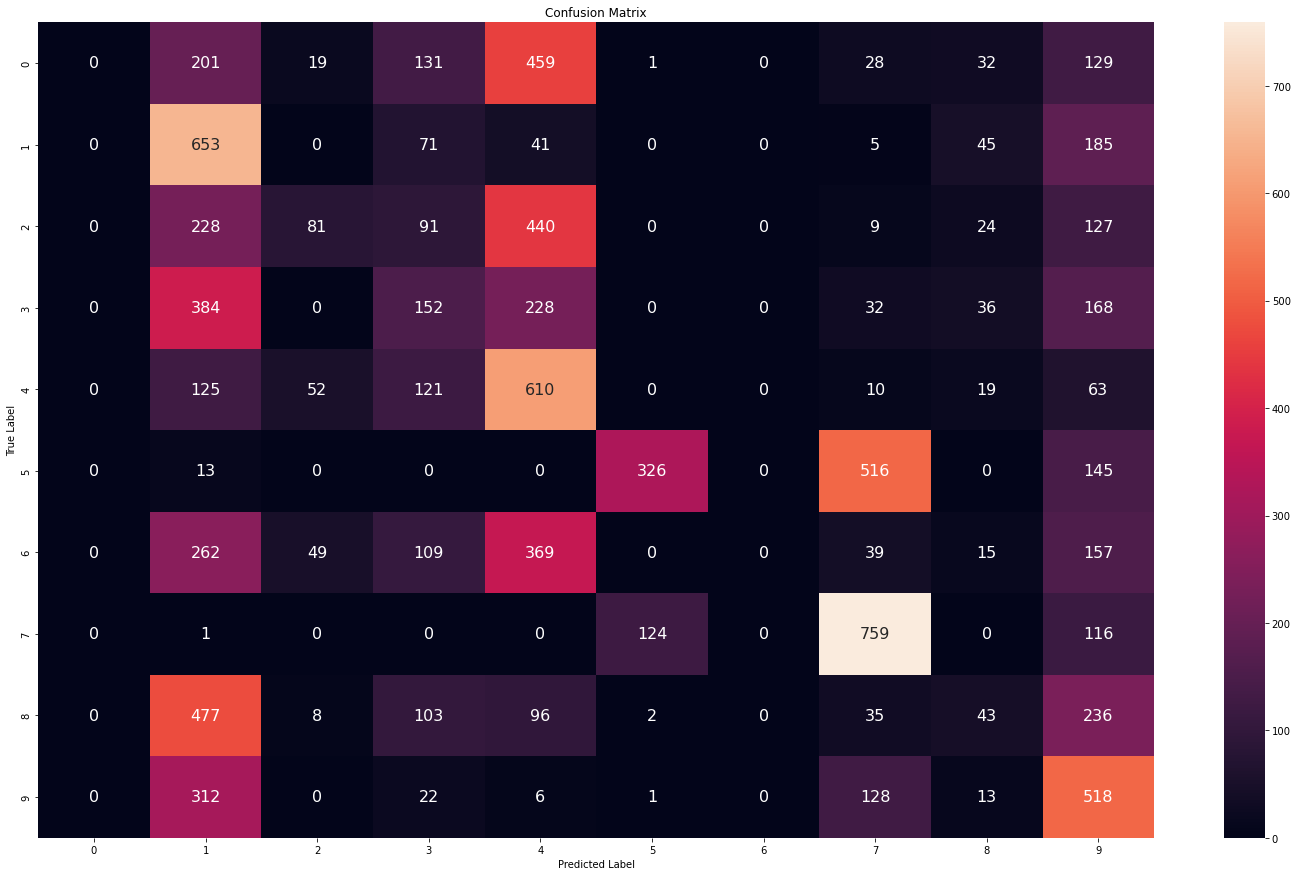

Accuracy of the  SVM  with  3  number of components:  0.643


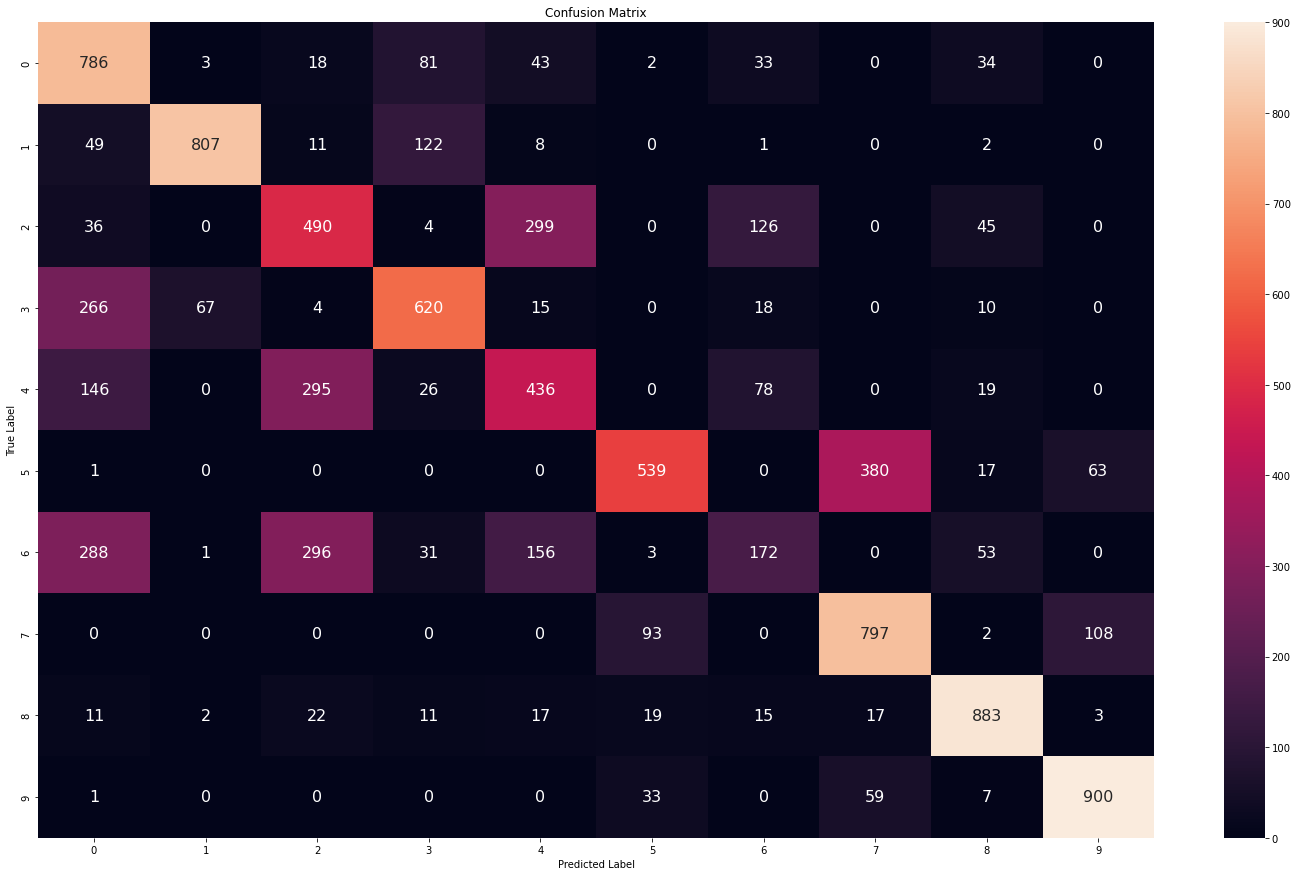

Accuracy of the  SVM  with  14  number of components:  0.8394


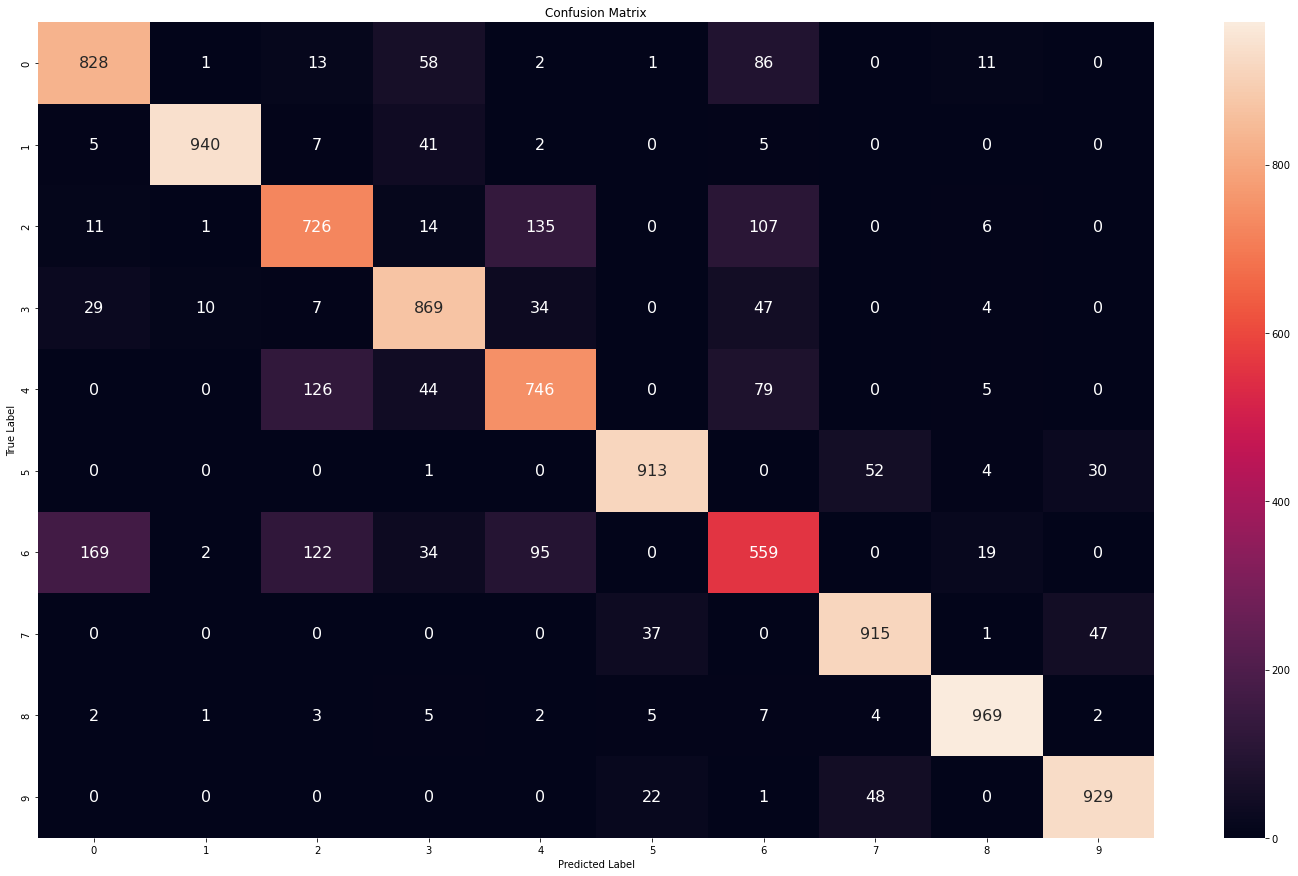

Accuracy of the  SVM  with  187  number of components:  0.8863


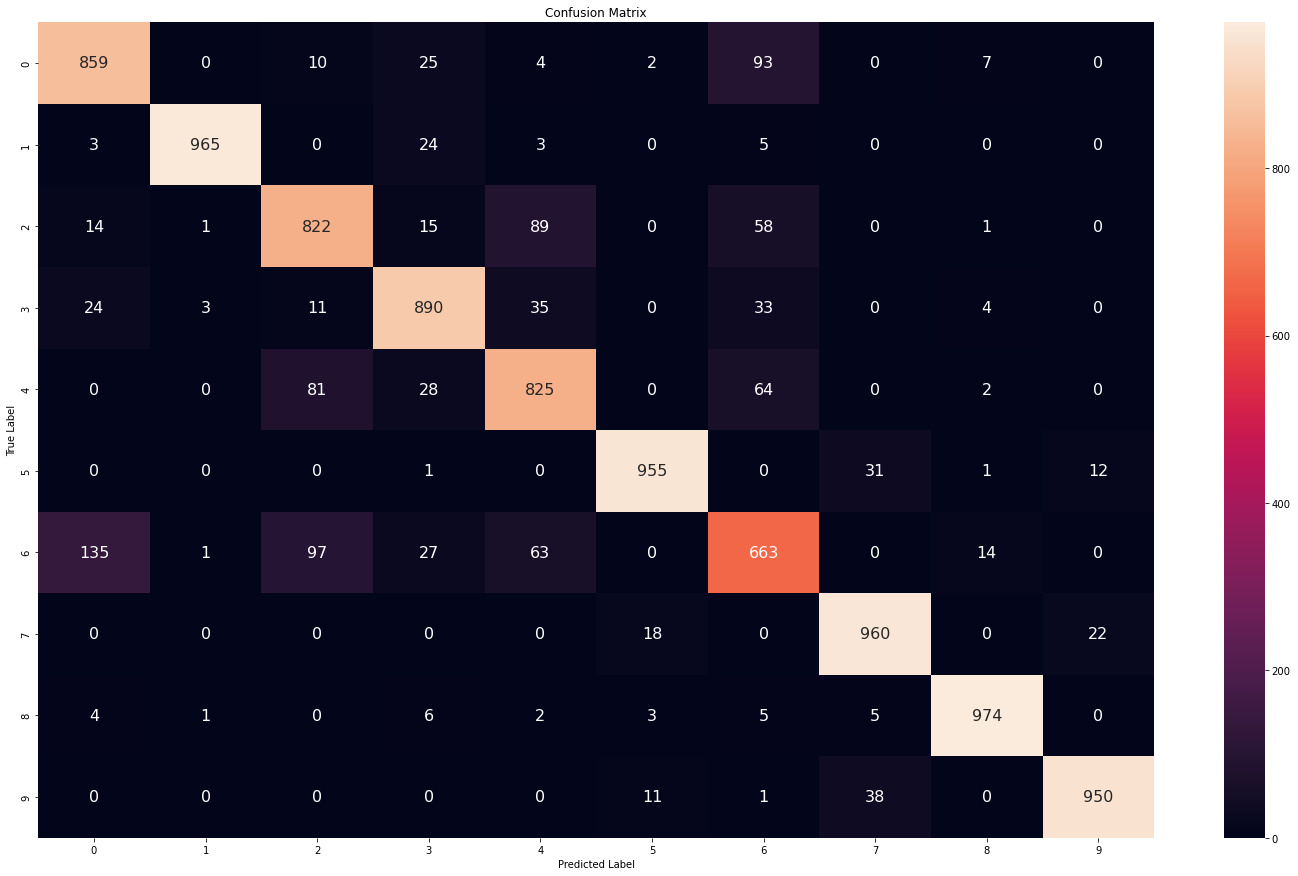

Accuracy of the  Decision Tree  with  1  number of components:  0.2241


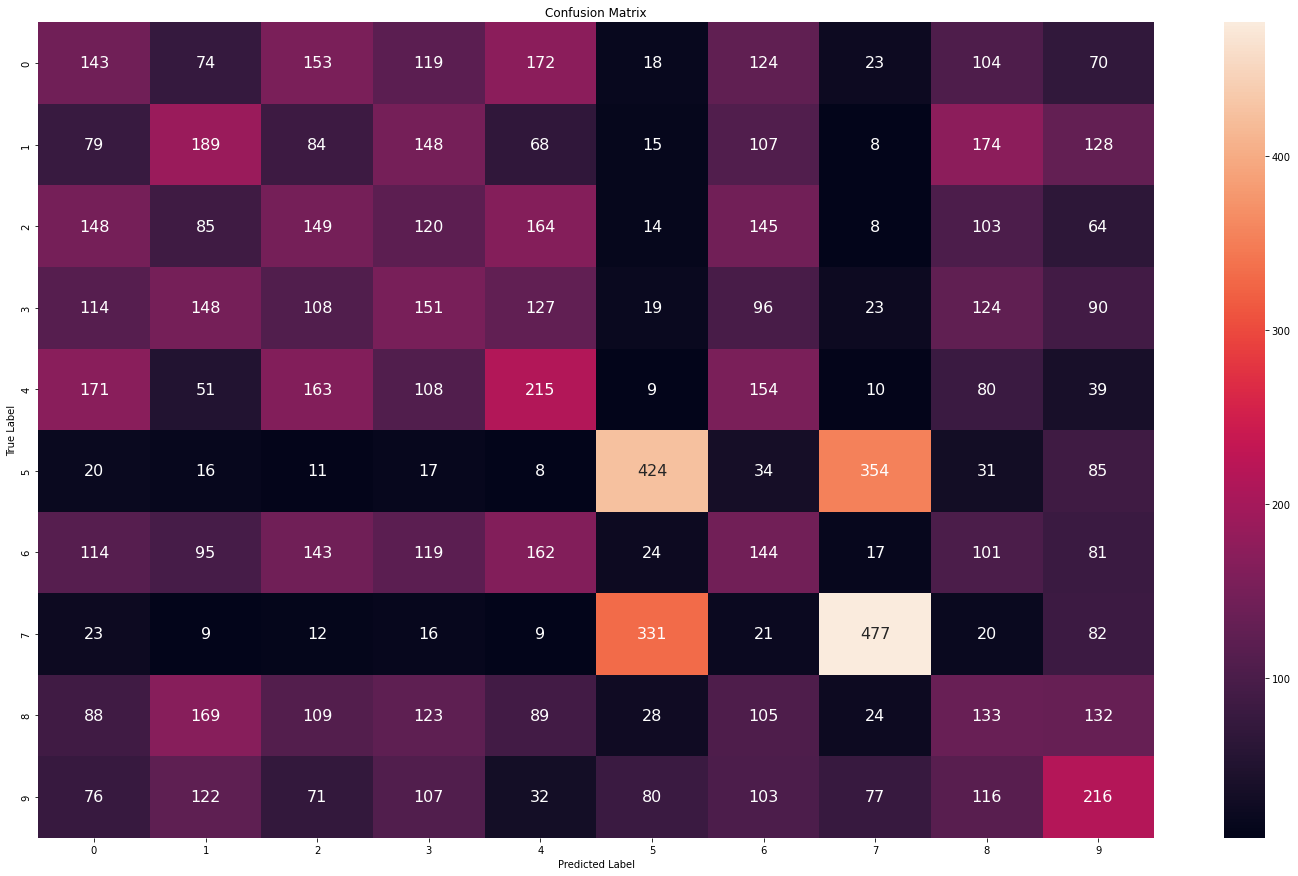

Accuracy of the  Decision Tree  with  3  number of components:  0.5622


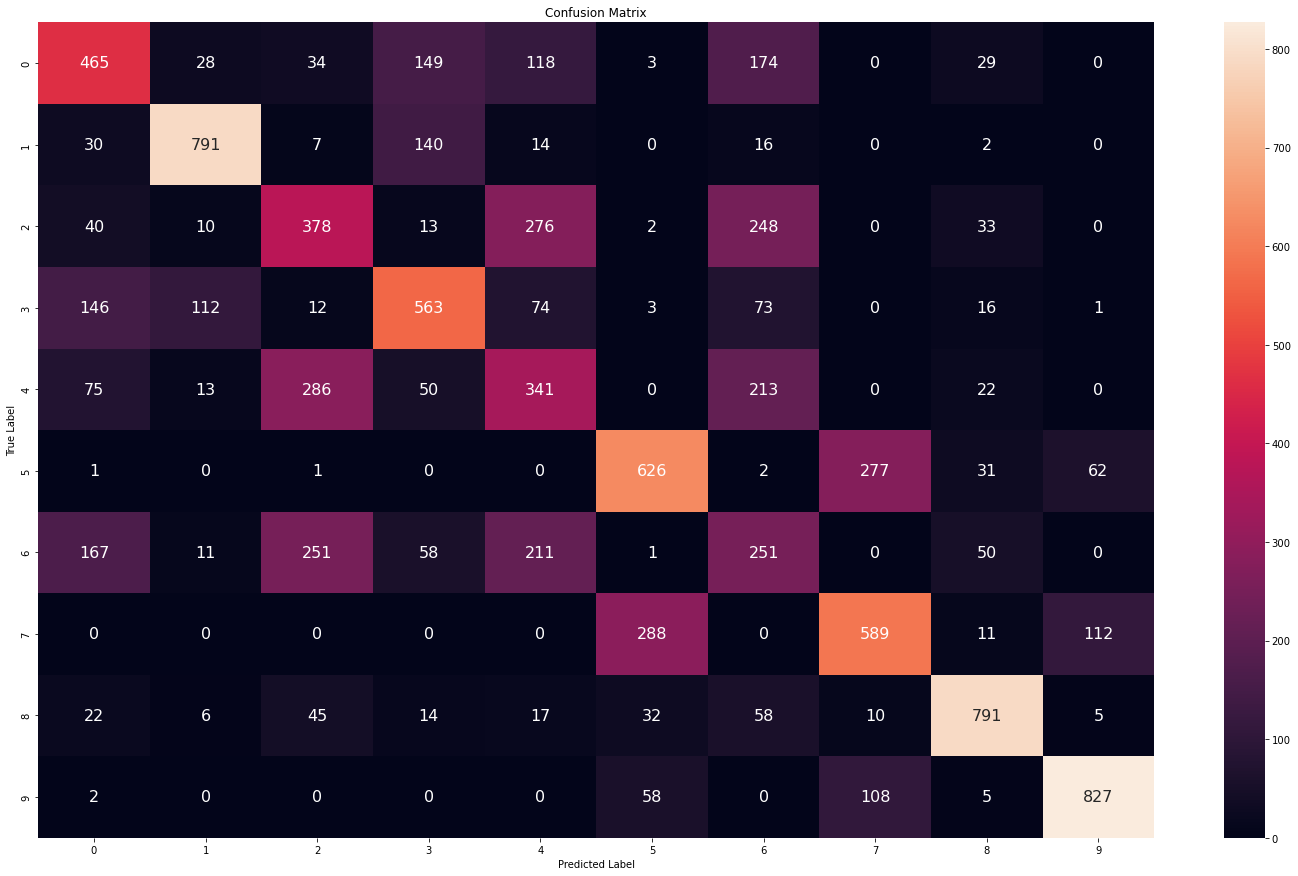

Accuracy of the  Decision Tree  with  14  number of components:  0.7588


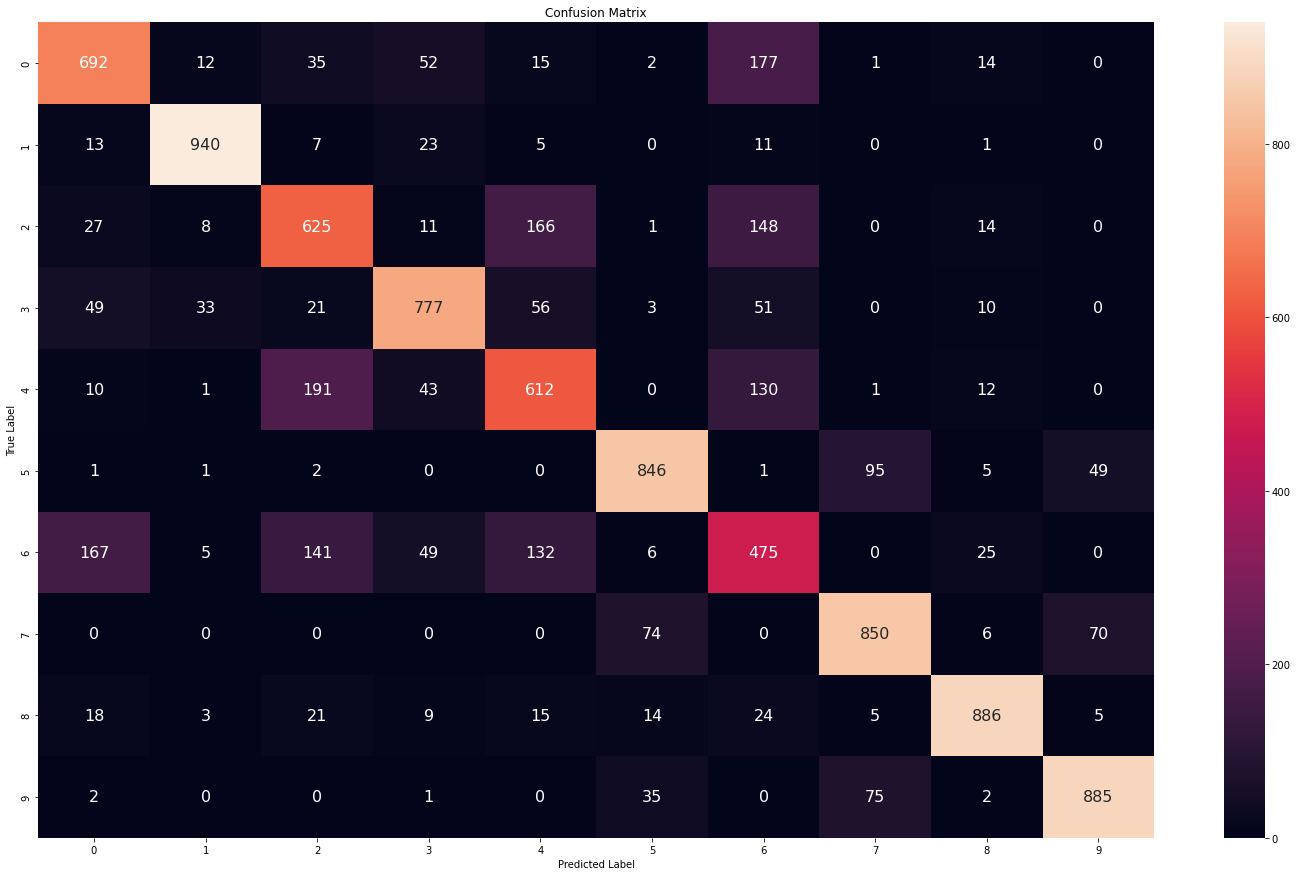

Accuracy of the  Decision Tree  with  187  number of components:  0.7554


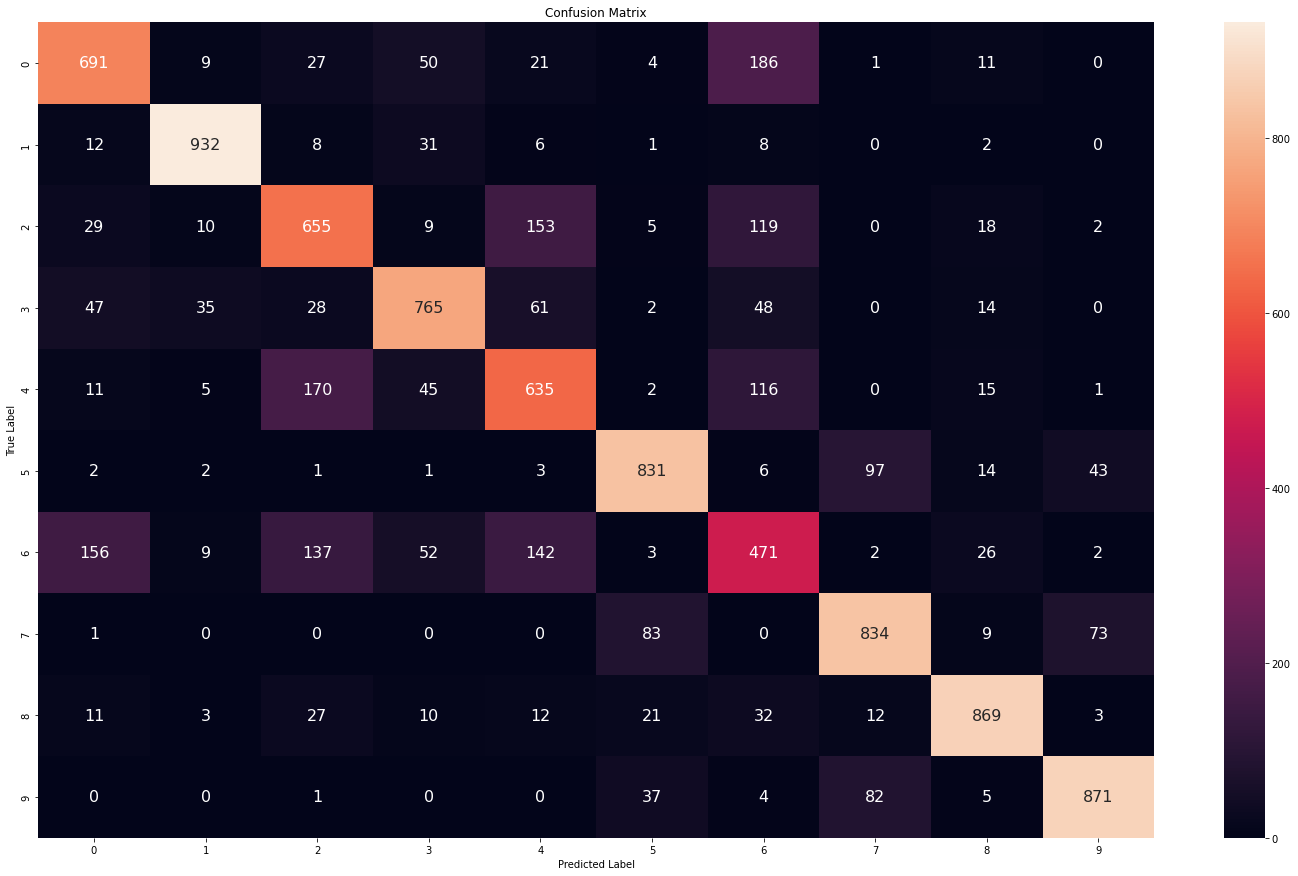

Accuracy of the  Random Forest  with  1  number of components:  0.2239


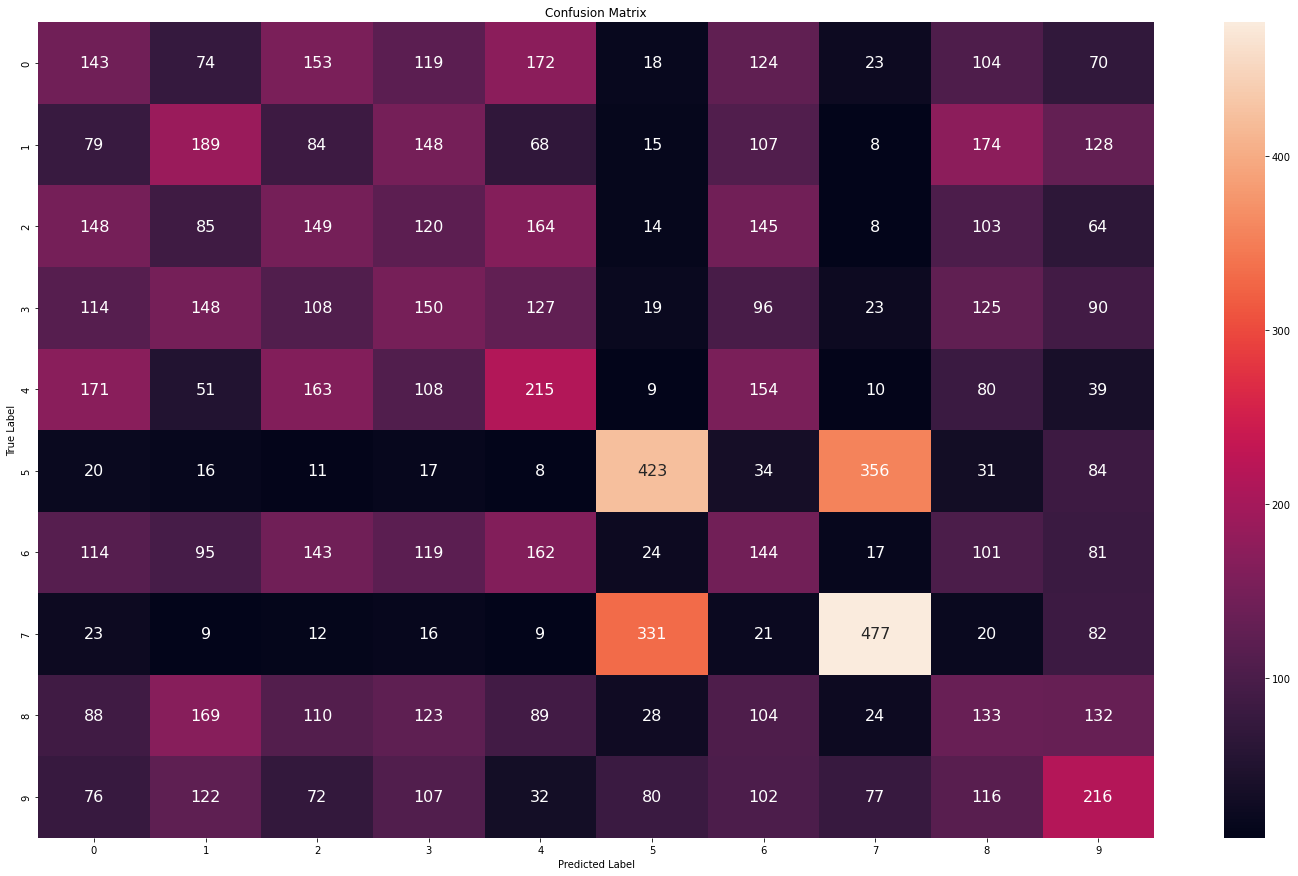

Accuracy of the  Random Forest  with  3  number of components:  0.635


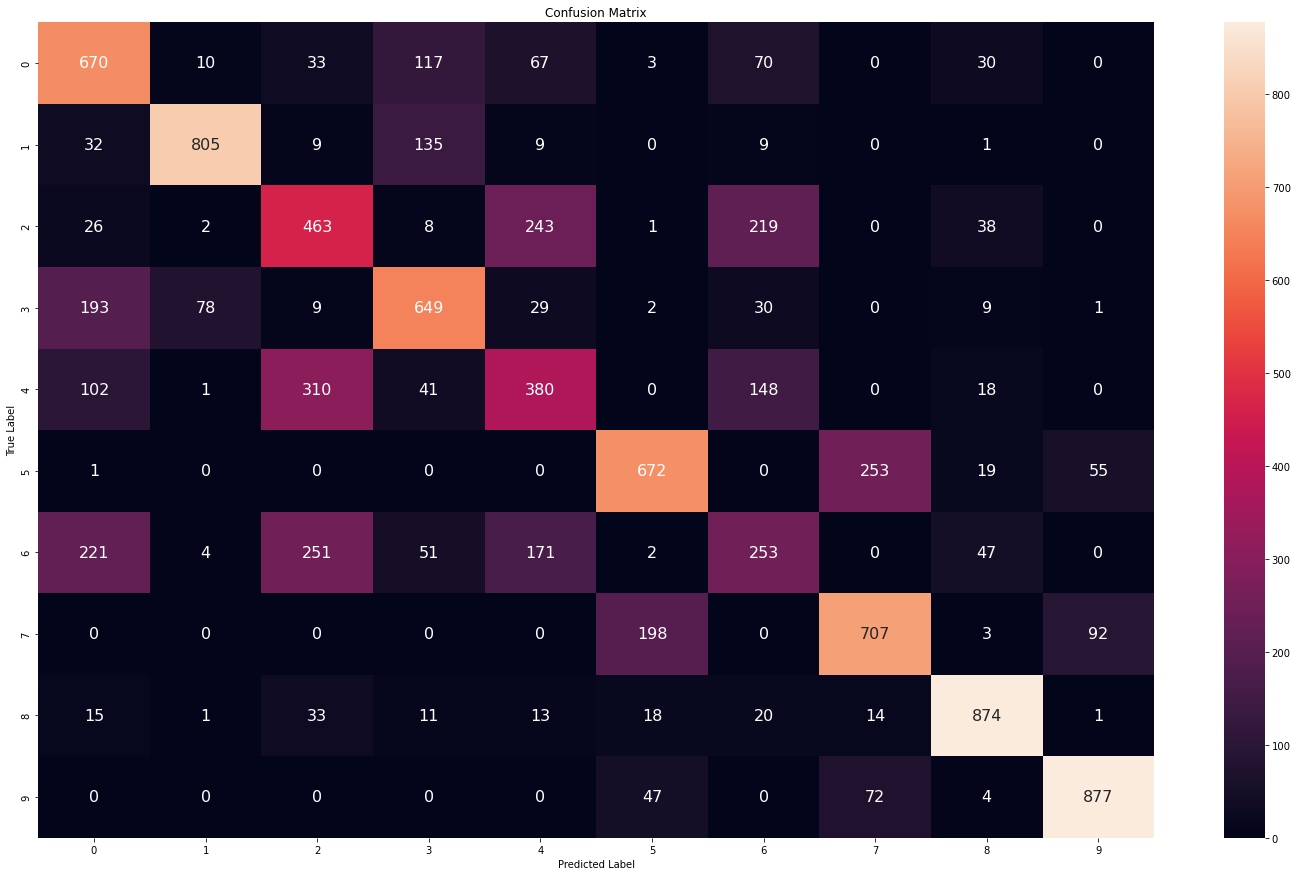

Accuracy of the  Random Forest  with  14  number of components:  0.8416


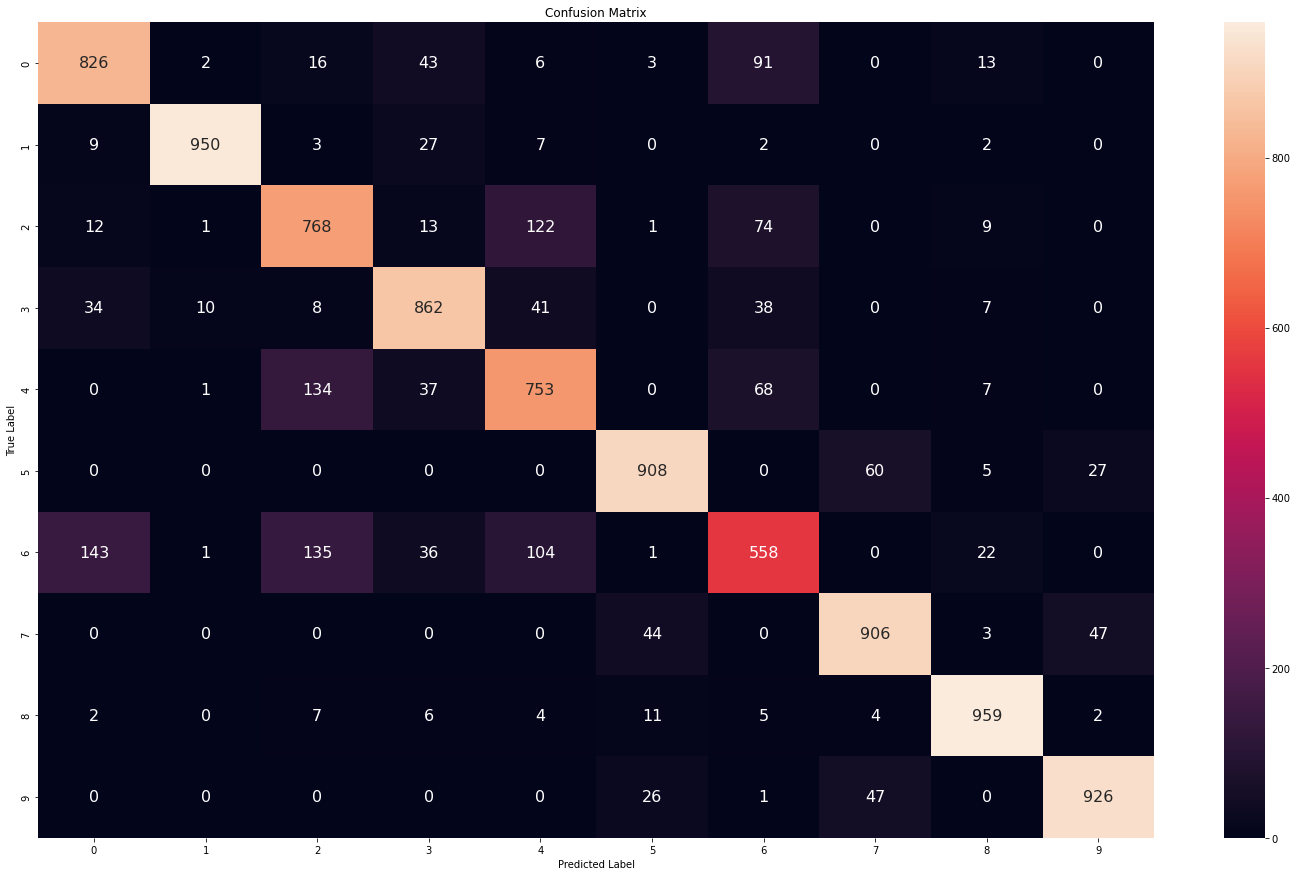

Accuracy of the  Random Forest  with  187  number of components:  0.8591


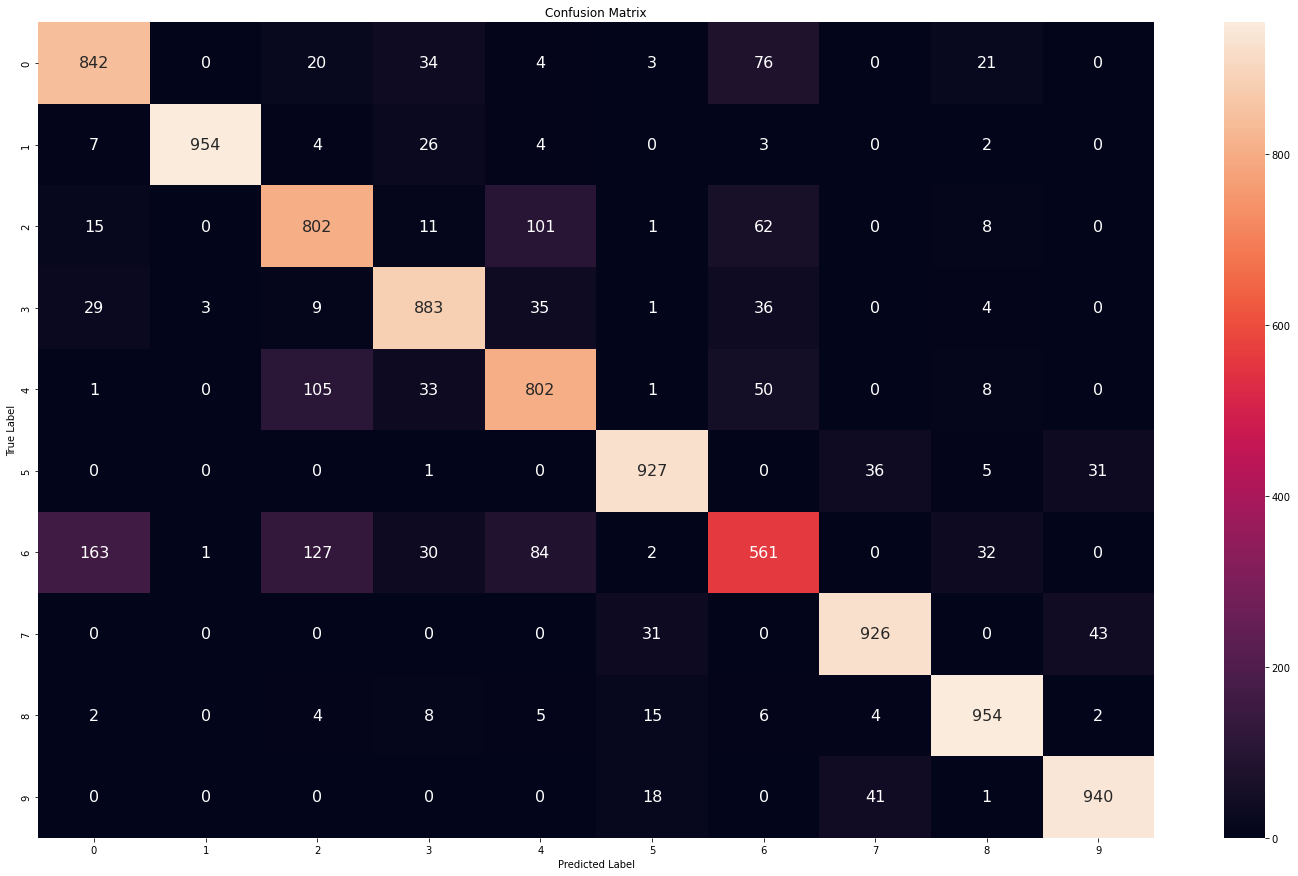

In [40]:
# Prediction each 5 model for each number of components that have been found
for m in range(models.size):
    accs,cms=build_model_withPca(models[m],names[m],X_train_std,X_test_std,y_train,y_test,components)
    acc_arr=np.append(acc_arr,accs)
    cm_arr=np.append(cm_arr,cms)

## Accuracy Table

In [41]:
# Resizing array of accuracies to create a table
acc_arr=np.resize(acc_arr,(5,4)) 

# Initializing a Pandas Dataframe for creating a table
# to display accuracies of the classification algorithms
# for each components
accuracy_table=pd.DataFrame(acc_arr, columns=['25% of variance', '50% of variance',
                                              '75% of variance','95% of variance'], index=names)
accuracy_table

,25% of variance,50% of variance,75% of variance,95% of variance
KNN,0.2222,0.6062,0.8185,0.8586
Perceptron,0.2324,0.3685,0.6652,0.7827
SVM,0.3142,0.6430,0.8394,0.8863
Decision Tree,0.2241,0.5622,0.7588,0.7554
Random Forest,0.2239,0.6350,0.8416,0.8591
